In [2]:
import os
import pandas as pd
import spacy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from scipy.stats import norm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
from nltk.util import ngrams
import wordcloud
import nltk, re, string, collections
from nltk.stem import WordNetLemmatizer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

/Users/sharduljanaskar/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
os.chdir("/Users/sharduljanaskar/Downloads")

In [4]:
data = pd.read_excel("Train Dataset.xlsx")

In [5]:
data_frame = data.copy()

In [6]:
check_null = pd.DataFrame(data = data.isnull().sum()).T.rename(index={0:'null_values'})
check_null = check_null.append(pd.DataFrame(data= data.isnull().sum()/data.shape[0] *100).T.rename(index={0:'null_values%'}))
check_null

,Sr no,experience,job_description,job_desig,job_type,key_skills,City coded,company_name_encoded,salary
null_values,0.0,0.0,4418.000000,0.0,15005.000000,1.00000,0.0,0.0,0.0
null_values%,0.0,0.0,22.310878,0.0,75.775174,0.00505,0.0,0.0,0.0


In [7]:
data.reset_index(drop=True,inplace = True)

In [8]:
def pre_process(df):
    df.drop(['Sr no','job_type','job_description'],1,inplace=True)
    df = df.dropna(axis = 0, how ='any')
    df.reset_index(drop=True,inplace = True)
    df['experience'] = df['experience'].str.replace("yrs","")
#     df['experience'] = (df.experience.str.replace(r' ', ''))

#     df['experience'].str.findall(r".+?(?=-)")  #  Lower
#     df['experience'].str.findall((r'(?<=-).*$'))  #  Upper

#     experience_bins = { 2:'0-2',5:'3-5',8:'6-8',11:'9-11',14:'12-14',17:'15-17',20:'18-20',23:'21-23',26:'24-26',30:'27-30'}

#     experience_lst = []
#     for i in df['experience']:
#         try:
#             splt = i.split('-',1)
#             a = float(splt[0])
#             b = float(splt[1])
#         except:
#             break   
#         for keys,values in zip(experience_bins.keys(),experience_bins.values()):
#             if b<=keys:
#                 experience_lst.append(values)
#                 break

#     df['experience_bins'] = experience_lst
    def exp_assumption(i):
        try:
            splt = i.split('-',1)
            first = float(splt[0])
            second = float(splt[1])

            return first+second/2
        except:
            return float(i) 
    df['experience'] = df['experience'].apply(exp_assumption)


#     df['experience_asm'] = df['experience_bins'].apply(exp_assumption)
#     df.drop(['experience_bins'],1,inplace = True)

    if 'salary' in df.columns:
        def split_sal(i):
            try:
                splt = i.split('to',1)
                first = float(splt[0])
                second = float(splt[1])
                return (first + second)/2
            except:
                return float(i)
        df['salary'] = df['salary'].apply(split_sal)
                                          
                                          
    df['key_skills']=df['key_skills'].apply(lambda x : x.split(',') if type(x)==str else [''])                                      
    
#     def clean_text_cols(col):
#         df[col] = df[col].str.replace('[^\w\s]','')
#     clean_text_cols(col='job_description')
#     df['job_description'].replace(regex=True,inplace=True,to_replace=r'\d',value=r'')
    
#     df['job_desig'].replace(regex=True, inplace=True, to_replace=r'[\d+]',value=r'') 
#     df['job_desig'] = df['job_desig'].astype(str)
    
#     cvec = CountVectorizer(stop_words='english',ngram_range=(2,9),max_df=0.8)
#     cvec.fit(df['job_desig'])
    
#     job_df = pd.DataFrame(cvec.transform(df['job_desig']).todense(),columns=cvec.get_feature_names())
#     top = job_df.sum().sort_values(ascending=False)[:170]
#     top_170 = top.index
#     final = job_df[top_170]
    
#     df.reset_index(drop=True, inplace=True)
#     final.reset_index(drop=True, inplace=True)
#     new_df = df.copy()
    
    les = []
    for i in df['key_skills']:
        core = ''.join(i)
        les.append(core)
    df['skills'] = les
    df['skill_count'] = df['key_skills'].apply(lambda x : len(x))
    
#     def normalized_word_Common(row):
#         w1 = set(map(lambda word: word.lower().strip(), row['job_description'].split(" ")))
#         w2 = set(map(lambda word: word.lower().strip(), row['skills'].split(" ")))    
#         return 1.0 * len(w1 & w2)
#     df['word_Common'] = df.apply(normalized_word_Common, axis=1)

#     def normalized_word_Total(row):
#         w1 = set(map(lambda word: word.lower().strip(), row['job_description'].split(" ")))
#         w2 = set(map(lambda word: word.lower().strip(), row['skills'].split(" ")))    
#         return 1.0 * (len(w1) + len(w2))
#     df['word_Total'] = df.apply(normalized_word_Total, axis=1)

#     def normalized_word_share(row):
#         w1 = set(map(lambda word: word.lower().strip(), row['job_description'].split(" ")))
#         w2 = set(map(lambda word: word.lower().strip(), row['skills'].split(" ")))    
#         return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
#     df['word_share'] = df.apply(normalized_word_share, axis=1)
    
    
    from sklearn.preprocessing import MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    skill_df = pd.DataFrame(mlb.fit_transform(df['key_skills']),columns=mlb.classes_, index=df.index)
    
    cols = set(map(str.lower,skill_df.columns))
    df1 = pd.DataFrame(data=np.zeros((len(skill_df),len(cols))),columns=cols)
    for col in skill_df.columns:
        df1[col.lower()] +=skill_df[col]    

    a = df1.sum().sort_values(ascending=False).head(200)
    df_skill = df1[a.index]
    
    df.reset_index(drop=True, inplace=True)
    df_skill.reset_index(drop=True, inplace=True)
    column = df.columns
    final_df = pd.concat([df,df_skill],1)
    if 'salary' in df.columns:
        final_df = final_df.drop(['key_skills','job_desig','company_name_encoded','salary','City coded'],1)
    else:
        final_df = final_df.drop(['key_skills','job_desig','company_name_encoded','City coded'],1)
    
    df.reset_index(drop=True, inplace=True)
    final_df.reset_index(drop=True, inplace=True)
    df_1 = pd.concat([df,final_df],1)
    df1 = df_1.drop(['skills','key_skills','job_desig',],1)
    
    
    city_df = pd.DataFrame(df1['City coded'])
    city = pd.get_dummies(city_df)
    city.rename(columns=lambda x: x[11:], inplace=True)
    
    df1.reset_index(drop=True, inplace=True)
    city.reset_index(drop=True, inplace=True)
    df_2 = pd.concat([df1,city],1)
    df_2.drop(['City coded','company_name_encoded'],1,inplace = True)
    df2 = df_2.copy()
    return df2

In [9]:
df = pre_process(data_frame)

In [10]:
df = df.loc[:,~df.columns.duplicated()]

In [11]:
df.shape

(19801, 219)

In [12]:
jd = [str(x) for x in data.job_description]

data.job_description = jd

In [13]:

def text_processing(data,col):
    #Converting message column into list of words 
    check_description = data[col].to_list()
    #Making a bag of words by converting list to one Big string.
    check_str = " ".join(check_description)
    #tokenizing without using NLTK tokenizer
    checklist = []
    for text in check_str.split():
        checklist.append(text)
    # Removing stopwords and custom made stopwords from the corpus of words
    stopwords = nltk.corpus.stopwords.words('english')
    noise = ['...','-',',','experience',';','1','2','3','4','5','6','7','8','9','0','10','/','&','(',')','@','35','(-','|','IIT/']
    stopwords.extend(noise)
    flatList_cleaned = [word for word in checklist if word.lower() not in stopwords]
    #Lemmatizing the word
    # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    
#     nlp = spacy.load('en', disable=['parser', 'ner'])
#     allowed_postags=['NOUN']
#     texts_out = []
#     for sent in flatList_cleaned:
#         doc = nlp("".join(sent)) 
#         texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-','ADJ', 'VERB', 'ADV'] else '' for token in doc if token.pos_ in allowed_postags]))
# #     # Do lemmatization keeping only Noun, Adj, Verb, Adverb
    lemm = WordNetLemmatizer()
    
    flat_cleaned = []
    for words in flatList_cleaned:
        words = lemm.lemmatize(words)
        flat_cleaned.append(words)
    str_list = list(filter(None, flat_cleaned)) 
    all_words = nltk.FreqDist(str_list)
    All_all = all_words.most_common()
    #considering the most frequent words whose covers around 50 percent of all the tokens
    sub_clusters = []
    count = 0 
    for word in All_all:
        count = count + word[1]
        if(count < len(str_list)*0.80):
            sub_clusters.append(word)
        else:
            break
    def find_Bi_tri_grams(flat_cleaned):
    #TRIGRAMS
        while '' in flat_cleaned:
            flat_cleaned.remove('')
        OLD_Trigrams = ngrams(flat_cleaned, 3)
        # get the frequency of each Bigram in our corpus
        OLD_TrigramFreq = collections.Counter(OLD_Trigrams)
        Tri = OLD_TrigramFreq.most_common()
        #BiGRAMS
        OLD_Bigrams = ngrams(flat_cleaned, 2)
        # get the frequency of each Bigram in our corpus
        OLD_BigramFreq = collections.Counter(OLD_Bigrams)
        Bi = OLD_BigramFreq.most_common()
    
        return Tri,Bi
    
    Tri,Bi = find_Bi_tri_grams(flat_cleaned)
    return sub_clusters,Tri,Bi

sub_clusters_jd,Tri_jd,Bi_jd = text_processing(data,'job_description')

In [14]:
Tri_jd

[(('nan', 'nan', 'nan'), 230),
 (('Technology', 'power', 'client'), 157),
 (('Accenture', 'Technology', 'power'), 151),
 (('power', 'client', 'business'), 151),
 (('client', 'business', 'innovative'), 151),
 (('business', 'innovative', 'technology'), 151),
 (('innovative', 'technology', 'established'), 151),
 (('technology', 'established', 'emerging'), 144),
 (('knowledge', 'across', 'customer'), 120),
 (('across', 'customer', 'lifecycle'), 113),
 (('customer', 'lifecycle', 'must;-'), 105),
 (('lifecycle', 'must;-', 'Candidate'), 105),
 (('domain', 'knowledge', 'across'), 94),
 (('banking', 'domain', 'knowledge'), 76),
 (('year', 'relevant', 'work'), 73),
 (('Credit', 'card/', 'banking'), 59),
 (('card/', 'banking', 'domain'), 59),
 (('good', 'communication', 'skill'), 57),
 (('written', 'verbal', 'communication'), 47),
 (('strong', 'analytical', 'ability'), 47),
 (('Utilize', 'strong', 'analytical'), 46),
 (('analytical', 'ability', 'evaluate'), 46),
 (('across', 'multiple', 'channel'

In [15]:
Bi_jd

[(('nan', 'nan'), 1000),
 (('year', 'relevant'), 390),
 (('least', 'year'), 295),
 (('5+', 'year'), 198),
 (('communication', 'skill'), 196),
 (('3+', 'year'), 174),
 (('client', 'business'), 165),
 (('Technology', 'power'), 163),
 (('year', 'work'), 160),
 (('power', 'client'), 157),
 (('good', 'communication'), 156),
 (('Accenture', 'Technology'), 151),
 (('business', 'innovative'), 151),
 (('innovative', 'technology'), 151),
 (('technology', 'established'), 151),
 (('established', 'emerging'), 144),
 (('Minimum', 'year'), 139),
 (('nan', 'Good'), 130),
 (('Good', 'knowledge'), 126),
 (('across', 'customer'), 125),
 (('minimum', 'year'), 124),
 (('knowledge', 'across'), 122),
 (('year', 'nan'), 119),
 (('customer', 'lifecycle'), 113),
 (('software', 'development'), 112),
 (('year', 'working'), 111),
 (('3-5', 'year'), 110),
 (('2-4', 'year'), 109),
 (('nan', 'Must'), 109),
 (('must;-', 'Candidate'), 107),
 (('lifecycle', 'must;-'), 105),
 (('domain', 'knowledge'), 105),
 (('good', 'k

In [16]:
# SKILLS


In [17]:
data.dropna(how = 'all',inplace = True)
data.reset_index(drop=True,inplace = True)

In [18]:
ks = [str(x) for x in data.key_skills]

data.key_skills = ks

In [19]:
sub_clusters_k,Tri_k,Bi_k= text_processing(data,'key_skills')

In [20]:
Tri_k


[(('Business', 'process,', 'Outsourcing,'), 201),
 (('Data', 'Analysis,', 'Data'), 111),
 (('SEO,', 'Digital', 'Marketing,'), 93),
 (('part', 'time,', 'freelancing,'), 84),
 (('time,', 'freelancing,', 'data'), 84),
 (('freelancing,', 'data', 'entry,'), 84),
 (('data', 'entry,', 'present'), 84),
 (('entry,', 'present', 'job,'), 84),
 (('present', 'job,', 'work'), 84),
 (('job,', 'work', 'home...'), 84),
 (('Machine', 'Learning,', 'Python,'), 79),
 (('Natural', 'Language', 'Processing,'), 69),
 (('Data', 'Analytics,', 'Data'), 58),
 (('Analytics,', 'Data', 'Analysis,'), 58),
 (('Digital', 'Marketing,', 'SEO,'), 57),
 (('Machine', 'Learning,', 'Data'), 54),
 (('Finance,', 'Financial', 'Analysis,'), 53),
 (('Digital', 'Marketing,', 'Google'), 52),
 (('Business', 'Analysis,', 'Business'), 52),
 (('Machine', 'Learning,', 'R,'), 51),
 (('Search', 'Engine', 'Marketing,'), 50),
 (('Learning,', 'Natural', 'Language'), 49),
 (('R,', 'Machine', 'Learning,'), 49),
 (('Project', 'Management,', 'Proj

In [21]:
skills = []
for i in data['key_skills']:
    for j in i.split(','):
        skills.append(j)
skills = pd.Series(skills)
skills = skills.str.lower()
print('Total number of skills in data : {}'.format(len(skills.unique())))


Total number of skills in data : 13696


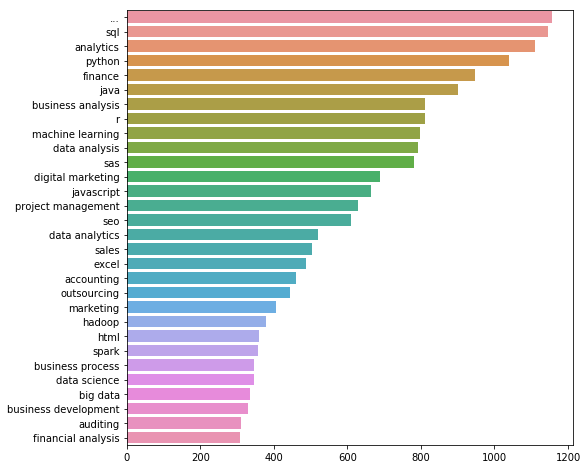

In [22]:
top30_skills = skills.str.strip().value_counts().head(30)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
sns.barplot(x=top30_skills.values,y=top30_skills.index)

In [23]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in data['key_skills']: 
    val = str(val) 
    tokens = val.split()        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

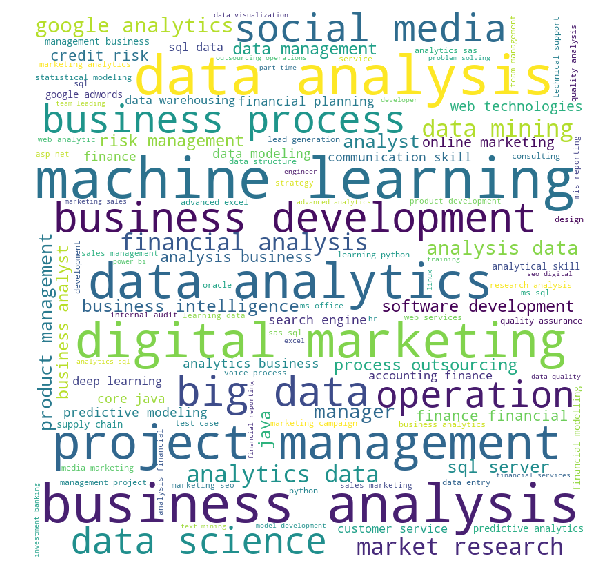

In [24]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [25]:
#top = job_df.sum().sort_values(ascending=False)[:170]

In [26]:
sub_clusters_j,Tri_j,Bi_j= text_processing(data,'job_desig')



In [27]:
Bi_j


[(('Business', 'Analyst'), 791),
 (('Digital', 'Marketing'), 430),
 (('Data', 'Scientist'), 410),
 (('Senior', 'Manager'), 350),
 (('Data', 'Analyst'), 285),
 (('Big', 'Data'), 273),
 (('Assistant', 'Manager'), 248),
 (('Product', 'Manager'), 232),
 (('Vice', 'President'), 228),
 (('Quality', 'Analyst'), 220),
 (('Data', 'Analytics'), 217),
 (('Business', 'Development'), 214),
 (('Software', 'Engineer'), 209),
 (('Machine', 'Learning'), 186),
 (('Senior', 'Analyst'), 183),
 (('Urgent', 'Opening'), 181),
 (('Senior', 'Business'), 169),
 (('Marketing', 'Manager'), 169),
 (('Research', 'Analyst'), 159),
 (('Analyst', 'Senior'), 155),
 (('Manager', 'Business'), 139),
 (('Marketing', 'Executive'), 138),
 (('Project', 'Manager'), 135),
 (('Full', 'Stack'), 118),
 (('Manager', 'Analytics'), 112),
 (('Data', 'Science'), 111),
 (('Senior', 'Software'), 107),
 (('Associate', 'Vice'), 105),
 (('Manager', 'Senior'), 105),
 (('Social', 'Media'), 104),
 (('General', 'Manager'), 103),
 (('Data', 'Eng

In [28]:
job_desi = []
for x in Bi_j:
    x_new = re.findall(r"'(.*?)'", str(x))
    if len(x_new)==2:
        design = x_new[0]+ " " + x_new[1] 
        job_desi.append(design)
    

In [29]:
job_desi

['Business Analyst',
 'Digital Marketing',
 'Data Scientist',
 'Senior Manager',
 'Data Analyst',
 'Big Data',
 'Assistant Manager',
 'Product Manager',
 'Vice President',
 'Quality Analyst',
 'Data Analytics',
 'Business Development',
 'Software Engineer',
 'Machine Learning',
 'Senior Analyst',
 'Urgent Opening',
 'Senior Business',
 'Marketing Manager',
 'Research Analyst',
 'Analyst Senior',
 'Manager Business',
 'Marketing Executive',
 'Project Manager',
 'Full Stack',
 'Manager Analytics',
 'Data Science',
 'Senior Software',
 'Associate Vice',
 'Manager Senior',
 'Social Media',
 'General Manager',
 'Data Engineer',
 'Urgent Requirement',
 'Digital Analytics',
 'Financial Planning',
 'Manager Data',
 'Financial Analyst',
 'Analyst Data',
 'Analytics Manager',
 'Banking Domain',
 'Data Architect',
 'Senior Associate',
 'Supply Chain',
 'Senior Data',
 'Base Job/',
 'Work/part Time',
 'Time Work/freelancer',
 'Work/freelancer work',
 'Consulting Firm',
 'Senior Consultant',
 'Sale

In [30]:
y = df['salary']

In [31]:
X = df.drop(['salary'],1)

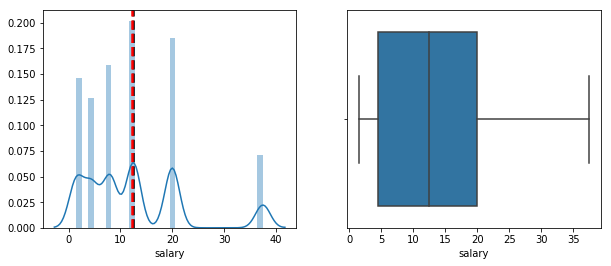

In [32]:
fig = plt.figure(figsize=(10,4))
sal_plot = df[df["salary"].notnull()]
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.axvline(sal_plot["salary"].median(), lw=2.5, ls='dashed', color='black')
ax1.axvline(sal_plot["salary"].mean(), lw=2.5, ls='dashed', color='red')
sns.distplot(sal_plot["salary"],ax = ax1)
sns.boxplot(df['salary'],ax = ax2)

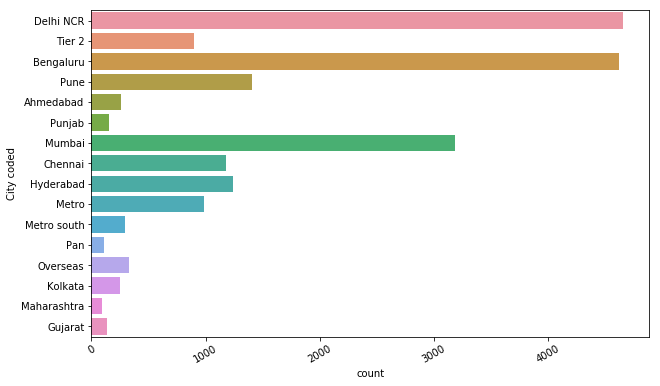

In [33]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,1,1)
sns.countplot(y=data['City coded'],ax=ax1)
p = plt.xticks(rotation=30)

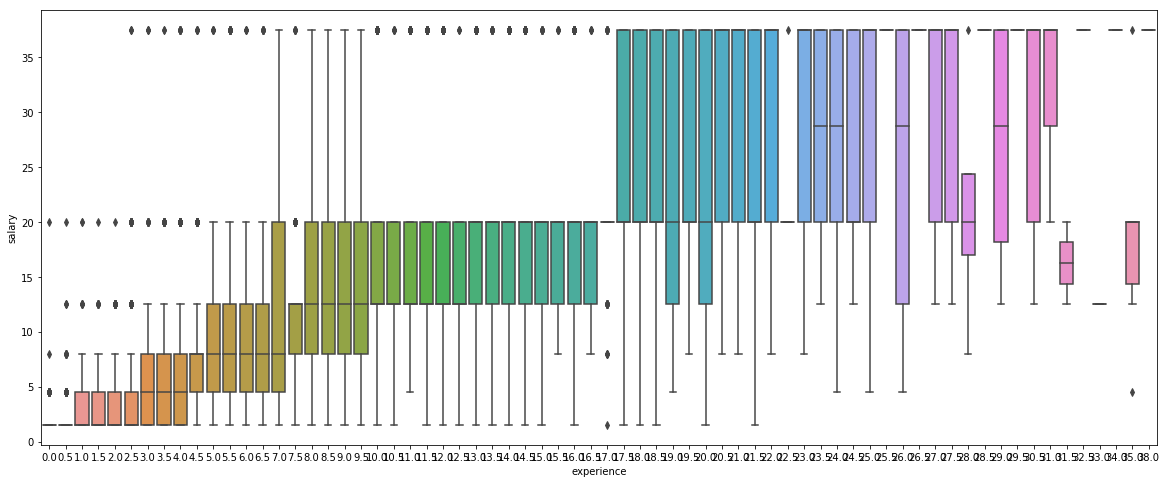

In [34]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,1,1)
sns.boxplot(x= df['experience'],y=df['salary'],ax=ax1)

In [35]:
df.describe()

,experience,salary,skill_count,...,python,analytics,sql,r,machine learning,data analysis,...,Kolkata,Maharashtra,Metro,Metro south,Mumbai,Overseas,Pan,Pune,Punjab,Tier 2
count,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,...,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000
mean,8.380410,12.304631,5.034392,0.058027,0.045351,0.043028,0.037271,0.033584,0.031009,0.029645,...,0.012424,0.004545,0.049846,0.014646,0.160800,0.016716,0.005707,0.071108,0.007828,0.045503
std,5.392172,9.693678,1.612069,0.233801,0.208079,0.202926,0.189430,0.180161,0.173345,0.169610,...,0.110770,0.067267,0.217632,0.120133,0.367356,0.128210,0.075329,0.257011,0.088131,0.208409
min,0.000000,1.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,4.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,12.500000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.500000,20.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.000000,37.500000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
cor = df.corr()

In [37]:
#Correlation with output variable
cor_target = abs(cor["salary"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

experience    0.663776
salary        1.000000
Overseas      0.124398
Name: salary, dtype: float64

In [38]:
#Salary and yearsExperienceAssumed have a moderately positive correlation.

Salary Skewness: 1.184077148990211
Salary Kurtosis: 1.0336383222198662


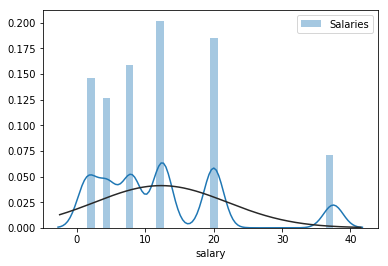

In [39]:

# Find amount of skewness and kurtosis. Plot distribution curve (blue) next to normal distribution (black).
print('Salary Skewness:', df['salary'].skew())
print('Salary Kurtosis:', df['salary'].kurt())



if (-0.5 <= df['salary'].skew()) &  (df['salary'].skew()<= 0.5):
    print('Salary distribution is approximately symmetric')
elif (-0.5 > df['salary'].skew() ) &  (df['salary'].skew()> 0.5):
    print('Salary distribution is skewed')

sns.distplot(df['salary'], fit=norm, label='Salaries')
plt.legend()

<Figure size 864x720 with 0 Axes>

(0, 53.27792004752531)

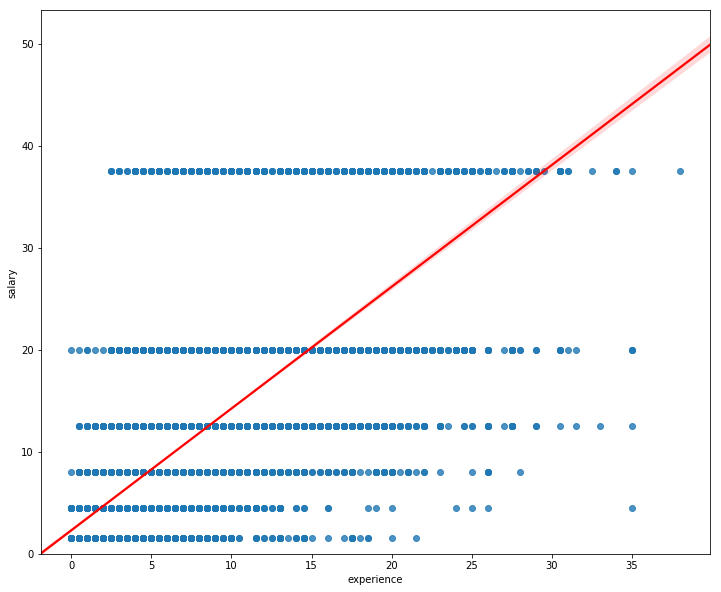

In [40]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='experience', y='salary', data=df, line_kws={'color':'red'})
plt.ylim(0,)

In [41]:
#   Data is widely spread from regression line and may need to be transformed. A weak positive correlation is also shown

In [42]:
# data['company_name_encoded']=pd.Categorical(data['company_name_encoded'])
# data['job_description']=pd.Categorical(data['job_description'])
# data['job_desig']=pd.Categorical(data['job_desig'])
# data['key_skills']=pd.Categorical(data['key_skills'])
# data['City coded']=pd.Categorical(data['City coded'])
# data['experience']=pd.Categorical(data['experience'])

In [43]:
model = LinearRegression()
rfe = RFE(model, 200)
fit = rfe.fit(X, y)
features = list(fit.ranking_)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 200
Selected Features: [ True False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True False  True  True  True False  True
 False  True  True  True  True  True False  True  True  True  True  True
 False  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
 False  True  True False  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  

In [44]:
feature = []
cols = X.columns.tolist()

for i in range(0,len(fit.ranking_)):
     if features[i] == 1:
            feature.append(cols[i])

In [45]:
feature

['experience',
 ' python',
 ' analytics',
 ' sql',
 ' r',
 ' machine learning',
 ' data analysis',
 ' java',
 ' sas',
 ' finance',
 ' business analysis',
 ' outsourcing',
 'sql',
 ' javascript',
 'finance',
 ' data analytics',
 'project management',
 'business analysis',
 ' excel',
 ' digital marketing',
 'digital marketing',
 ' sales',
 ' business process',
 ' spark',
 ' seo',
 'seo',
 ' big data',
 'accounting',
 ' marketing',
 'javascript',
 ' data mining',
 'analytics',
 ' hadoop',
 ' auditing',
 ' css',
 ' financial analysis',
 ' jquery',
 ' data science',
 ' sem',
 ' mysql',
 ' analytical',
 'sas',
 ' business development',
 'data analysis',
 ' nosql',
 ' market research',
 ' consulting',
 ' accounting',
 ' c++',
 ' c#',
 'machine learning',
 ' etl',
 'sales',
 ' hive',
 ' operations...',
 ' banking',
 ' analytics...',
 ' xml',
 ' rest',
 ' linux',
 ' algorithms',
 ' scala',
 ' forecasting',
 ' social media',
 ' data management',
 ' strategy',
 ' product management',
 ' data ware

In [46]:
#with the best features given by rfe

In [47]:
X1 = df[feature]

In [48]:
y1 = df['salary']

In [49]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [50]:
#modelling
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [51]:
lm = LinearRegression()
lm.fit(X_train1, y_train)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:

# View coefficients of linear regression object
print(lm.intercept_)
print(lm.coef_)

12.308881421207724
[ 1.19664613e+00  5.71217641e-01 -5.55694149e-01 -1.87922925e+00
  3.09275592e+00  2.34390108e+00 -5.14963751e-01  1.41294557e+00
 -2.31382148e+00 -1.18577661e+00 -8.74841890e-01 -2.23244653e-02
 -1.52248684e+00  8.70666846e-01  1.18221895e+00 -9.04876064e-01
 -2.70695150e+00  3.82657127e-01  4.52632285e-01  7.92680438e-01
  1.39999452e+00  9.54747537e-01  8.75244068e-01 -1.19982356e-01
  1.42522829e+00 -3.82857153e-01  1.51949135e+00  1.81212987e+00
 -6.59077643e-01  2.63009632e-01 -2.42504922e-01 -1.49974480e+00
  2.27657876e+00  2.96535485e+00 -2.29776772e+00 -4.26508308e-01
 -2.30808291e+00 -1.19445939e+00  1.67847702e+00 -1.71467325e+00
 -1.06735363e-01 -4.67481545e-01 -1.73225037e+00  4.43196730e+00
  1.96529713e+00 -1.21206575e+00  6.16074856e-01  1.07192126e+00
 -1.07632352e+00  9.09931058e-01 -3.82165609e+00 -2.98867195e-01
  9.69477172e-01 -4.59527941e-01 -4.35416669e-01  2.42471632e-02
  6.24155153e-02  2.00061418e+00 -1.74659020e-01  2.07890567e-01
 -3.76

In [53]:

# Store linear regression predictions in variable
yhat = lm.predict(X_test1)

# View first 5 predictions
print("The output of the first five predicted values are:", yhat[0:5])

The output of the first five predicted values are: [ 6.40326922  3.02209311 11.76572782  2.732183   17.26882605]


In [54]:

# Print MSE of training data
print("The mean squared error of our prediciton model is:", mean_squared_error(y_test, yhat))

The mean squared error of our prediciton model is: 46.34773934742562


In [55]:
# Print accuracy score using 5-fold cross validation
scores = cross_val_score(lm, X_train1, y_train, cv=5)
print("5-Fold Cross Validation Accuracy (train data):", (np.mean(scores)), (np.std(scores)))

5-Fold Cross Validation Accuracy (train data): 0.48405394897857035 0.007725934912753363


In [56]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, title):
    width = 10
    height=6
    plt.figure(figsize=(width, height))
    
    ax1=sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2=sns.distplot(BlueFunction, hist=False, color="b", label=BlueName)
    
    plt.title(title)
    plt.xlabel("Proportion of Jobs")
    plt.ylabel("Salary (in thousand dollars)")
    plt.show()
    plt.close()

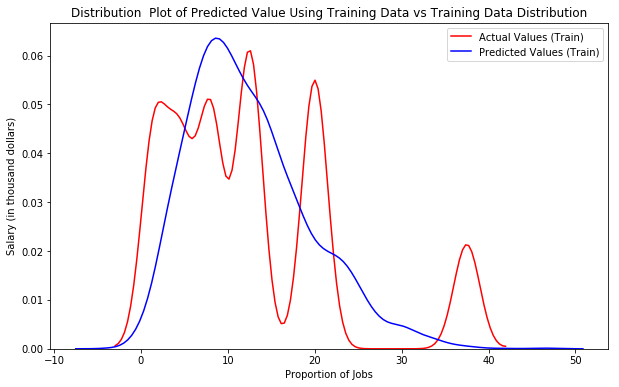

In [57]:
# View distribution of actual salaries compared to predicted salaries
Title = 'Distribution  Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat, "Actual Values (Train)", "Predicted Values (Train)", Title)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The output of the first five predicted values are: [ 6.38052388  2.92456618 11.74569769  2.71618667 17.30172143]
The  root mean squared error of our prediciton model is: 6.819926818407254
5-Fold Cross Validation Accuracy (train data): 0.48272577764542346 0.007139287041612521


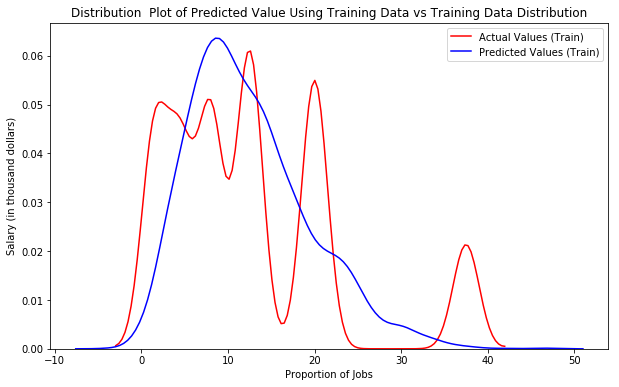

In [58]:
#with all features
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)
#modelling
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
Xtrain1 = pca.fit_transform(Xtrain)
Xtest1 = pca.transform(Xtest)
_variance = pca.explained_variance_ratio_
lin = LinearRegression()
lin.fit(Xtrain1, ytrain)
# View coefficients of linear regression object
# print(lin.intercept_)
# print(lin.coef_)
# Store linear regression predictions in variable
yhat1 = lin.predict(Xtest1)
# View first 5 predictions
print("The output of the first five predicted values are:", yhat1[0:5])
# Print MSE of training data
print("The  root mean squared error of our prediciton model is:", np.sqrt(mean_squared_error(ytest, yhat1)))
# Print accuracy score using 5-fold cross validation
scores = cross_val_score(lin, Xtrain1, ytrain, cv=5)
print("5-Fold Cross Validation Accuracy (train data):", (np.mean(scores)), (np.std(scores)))
# View distribution of actual salaries compared to predicted salaries
Title = 'Distribution  Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(ytrain, yhat1, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [59]:
def PollyPlot(X_train, X_test, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    xmax = max([X_train.values.max(), X_test.values.max()])
    xmin = min([X_train.values.min(), X_test.values.min()])
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(X_train, y_train, 'ro', label='Training Data')
    plt.plot(X_test, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predict Function')
    plt.ylim(-100, 5000)
    plt.ylabel('Salary')
    plt.legend


In [60]:
def ViolinPlot(data, var):
    data = pd.concat([train_data['salary'], train_data[var]], axis=1)
    f, ax = plt.subplots(figsize=(12, 8))
    fig = sns.violinplot(x=var, y='salary', data=data, scale='count', inner='quartile')
    plt.xticks(rotation=75)

In [61]:
# Distribution, accuracy score, and MSE are not incredibly different when comparing the training and testing data. We will see if MSE can be improved by reducing it to less than 360.

# Three models that may improve results over the baseline model:
# 1: Apply polynomial transformation
# 2: Use ridge regression
# 3: Use random forest

In [62]:
# View shape and features of all datasets to be used
print("Number of test samples:", X_test1.shape, "\nwith these features:\n", X_test.columns)
print("\nNumber of training samples:", X_train1.shape, "\nwith these features:\n", X_train.columns)
print("\nNumber of test salaries:", y_test.shape)
print("Number of training salaries:", y_train.shape)

Number of test samples: (3961, 200) 
with these features:
 Index(['experience', ' python', ' analytics', ' sql', ' r',
       ' machine learning', ' data analysis', ' java', ' sas', ' finance',
       ...
       'Kolkata', 'Maharashtra', 'Metro', 'Metro south', 'Mumbai', 'Overseas',
       'Pan', 'Pune', 'Punjab', 'Tier 2'],
      dtype='object', length=200)

Number of training samples: (15840, 200) 
with these features:
 Index(['experience', ' python', ' analytics', ' sql', ' r',
       ' machine learning', ' data analysis', ' java', ' sas', ' finance',
       ...
       'Kolkata', 'Maharashtra', 'Metro', 'Metro south', 'Mumbai', 'Overseas',
       'Pan', 'Pune', 'Punjab', 'Tier 2'],
      dtype='object', length=200)

Number of test salaries: (3961,)
Number of training salaries: (15840,)


In [63]:

# Fit and transform the variables using 2nd order polynomial
pr = PolynomialFeatures(2)
X_train_pr = pr.fit_transform(X_train1)
X_test_pr = pr.fit_transform(X_test1)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [64]:
# ridge regression 

In [404]:
RidgeModel = Ridge(alpha=1.0)

In [405]:
RidgeModel.fit(X_train_pr, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [406]:
yhat_ridge_train = RidgeModel.predict(X_train_pr)
yhat_ridge_test = RidgeModel.predict(X_test_pr)

In [407]:
print('Predicted:', yhat_ridge_train[0:4])
print('Actual :', y_train[0:4].values)

Predicted: [ 8.16919495 10.33821601 14.80668282 33.68697961]
Actual : [ 4.5  8.  20.  37.5]


In [408]:
print('Predicted:', yhat_ridge_test[0:4])
print('Actual :', y_test[0:4].values)

Predicted: [3.54722044 2.46924651 3.83275894 2.59529672]
Actual : [ 8.   1.5 37.5  4.5]


In [409]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_ridge_test))
print("RMSE: %f" % (rmse))

RMSE: 7.112208


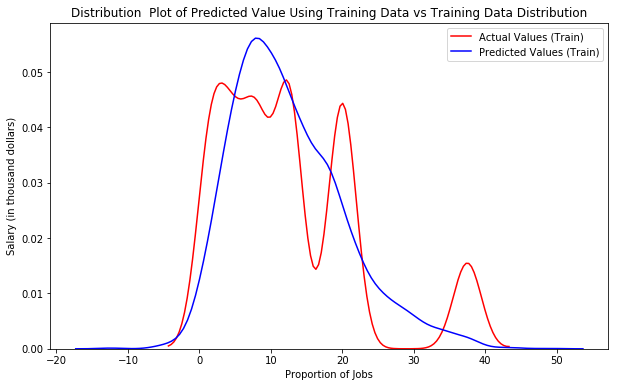

In [410]:
Title = 'Distribution  Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test,yhat_ridge_test, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [70]:
# random forest

In [64]:
rf = RandomForestRegressor(n_estimators=50, random_state=1)

In [65]:
rf.fit(X_train1, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [66]:
predictions = rf.predict(X_test1)
predictions[0:5]
print('Actual :', y_test[0:5].values)

array([ 1.72      , 10.57464286, 22.43      , 25.835     , 17.57      ])

Actual : [ 4.5 12.5 12.5 37.5 20. ]


In [67]:
print("R-squared of test data:", rf.score(X_test1, y_test))
print("RMSE of test data:",np.sqrt(mean_squared_error(y_test, predictions)))

R-squared of test data: 0.4497832097302792
RMSE of test data: 7.440090331438758


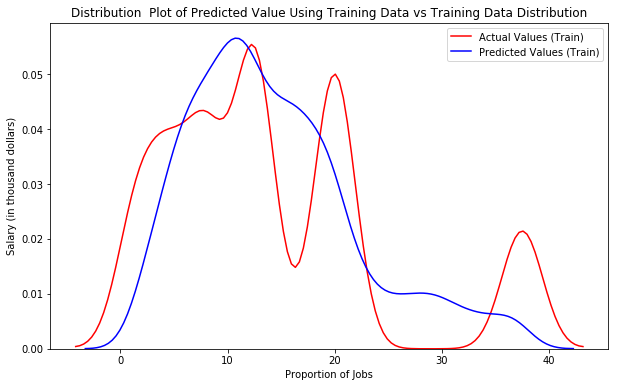

In [68]:
Title = 'Distribution  Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, predictions, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [65]:
rf1 = RandomForestRegressor(n_estimators=100, random_state=1)

In [66]:
rf1.fit(Xtrain1, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [67]:
predictions = rf1.predict(Xtest1)
predictions[0:5]
print('Actual :', y_test[0:5].values)

array([ 4.58166667,  3.95083333, 13.776     ,  3.33875   , 17.1027079 ])

Actual : [ 8.   1.5 37.5  4.5 20. ]


In [68]:
print("R-squared of test data:", rf1.score(Xtest1, y_test))
print("RMSE of test data:",np.sqrt(mean_squared_error(y_test, predictions)))

R-squared of test data: 0.49768814692015434
RMSE of test data: 6.8200038657187045


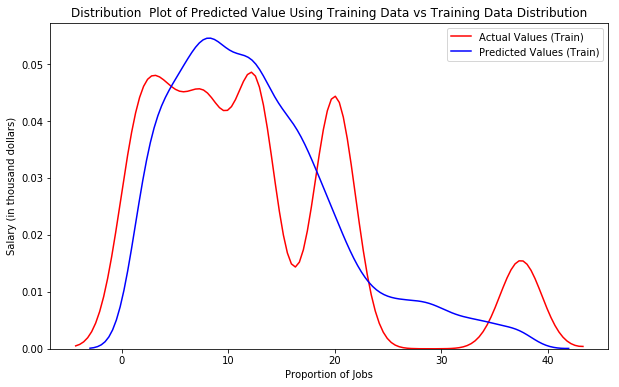

In [69]:
Title = 'Distribution  Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, predictions, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [70]:
# xgboost

In [71]:
import xgboost as xgb

In [417]:
x = df[feature]

In [418]:
x = x.loc[:,~x.columns.duplicated()]

In [419]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [420]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 50)

In [421]:
xg_reg.fit(X_train1,y_train)

preds = xg_reg.predict(X_test1)

[15:15:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [422]:
preds[0:5]
print('Actual :', y_test[0:5].values)

array([ 5.579394 ,  3.5211523,  8.446014 ,  6.4739842, 16.197845 ],
      dtype=float32)

Actual : [ 8.   1.5 37.5  4.5 20. ]


In [423]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 6.642375


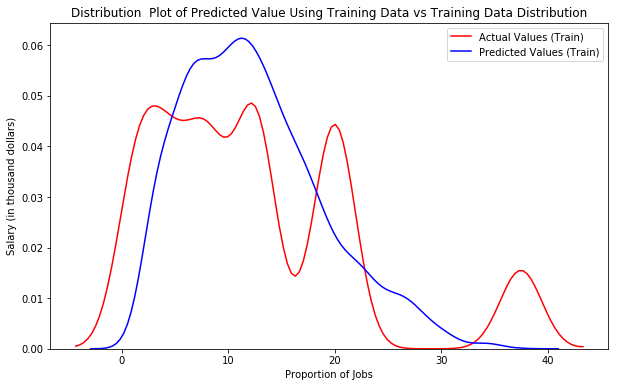

In [424]:
Title = 'Distribution  Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, preds, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [72]:
x_1 = X.loc[:,~X.columns.duplicated()]

In [73]:
data_dmatrix1 = xgb.DMatrix(data=x_1,label=y)

In [74]:
xg_reg1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 100)

In [75]:
xg_reg1.fit(Xtrain1,ytrain)

preds = xg_reg1.predict(Xtest1)

[16:26:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [76]:
preds[0:5]
print('Actual :', ytest[0:5].values)

array([ 5.3551865,  2.3678775, 10.060395 ,  4.4589133, 17.935862 ],
      dtype=float32)

Actual : [ 8.   1.5 37.5  4.5 20. ]


In [77]:
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 6.504964


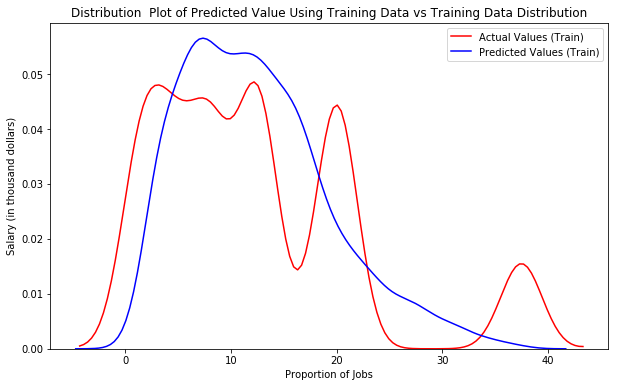

In [78]:
Title = 'Distribution  Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, preds, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [91]:
#using xgboost cv

In [98]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[12:33:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [99]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,15.370811,0.098586,15.371165,0.208223
1,14.378813,0.205753,14.383058,0.105552
2,13.432275,0.267239,13.441894,0.118055
3,12.609018,0.347377,12.625353,0.198721
4,11.895120,0.431485,11.917392,0.281695


In [ ]:
#test data

In [95]:
df_test1 = pd.read_excel('Test Dataset.xlsx')

In [96]:
df_test = df_test1.copy()

In [97]:
check_null = pd.DataFrame(data = df_test.isnull().sum()).T.rename(index={0:'null_values'})
check_null = check_null.append(pd.DataFrame(data= df_test.isnull().sum()/df_test.shape[0] *100).T.rename(index={0:'null_values%'}))
check_null

,Sr no,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded
null_values,0.0,0.0,1522.000000,0.0,4964.000000,0.0,0.0,0.0
null_values%,0.0,0.0,23.057113,0.0,75.200727,0.0,0.0,0.0


In [98]:
df_1 = df_test1.drop(['job_type'],1,inplace=True)
df_test1.reset_index(drop=True,inplace = True)

In [99]:
df_test1.shape

(6601, 7)

In [100]:
df_test1.reset_index(drop=True,inplace = True)

In [101]:
df_test = df_test.rename(columns = {'location' : 'City coded'})

In [102]:
test_df = pre_process(df_test)

In [103]:
test_df = test_df.loc[:,~test_df.columns.duplicated()]

In [104]:
#modelling
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_test_1 = pca.fit_transform(test_df)
X_test_1 = pca.transform(test_df)
explained_variance = pca.explained_variance_ratio_

In [105]:
df_test1['linear_regression'] = pd.Series(lin.predict(X_test_1))

In [106]:
df_test1['XGB Regression'] = pd.Series(xg_reg1.predict(X_test_1))

In [107]:
df_test1['Random Forest'] = pd.Series(rf1.predict(X_test_1))

In [108]:
df_test1.to_excel("prediction_output.xlsx")

In [109]:
df_test1

,Sr no,experience,job_description,job_desig,key_skills,location,company_name_encoded,linear_regression,XGB Regression,Random Forest
0,1,7-12 yrs,Professional experience in Java/J2EE based ser...,IT Technology Senior Consultant/java/ J2ee/ Se...,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066,-2.999351e+11,15.878312,19.656250
1,2,0-5 yrs,We are looking for 20+ Fresher/Experienced Can...,Medical Billing Process | International KPO | ...,"Medical Billing, Insurance Processing",Ahmedabad,2629,-1.896864e+10,10.646251,4.888604
2,3,3-6 yrs,Should understand overall integration framewor...,Oracle Sales Cloud Functional Consultant,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448,1.441652e+10,10.775660,9.607602
3,4,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,"offline, online, internet, part time, home bas...",Metro,2711,-1.054571e+11,4.071911,2.509655
4,5,0-5 yrs,NaN,Process Associate / Sr Process Associate / Tec...,"voice support, analytical skills, Process asso...",Hyderabad,40,-4.671316e+10,3.566334,4.308418
5,6,4-6 yrs,5-6 years of good experience in handling compl...,Compliance Lead - Product Based Analytics Comp...,"ms project, problem solving, compliance issue,...",Chennai,831,-1.006398e+11,7.715893,8.291935
6,7,10-20 yrs,NaN,Cyient Ltd:: Hiring for Hardware Design Engine...,"Hardware Design, Six Sigma Certified, Product ...",Hyderabad,619,-5.476291e+10,17.972723,27.215734
7,8,0-2 yrs,NaN,Hiring German Language Experts- Hyderabad,"german language, german, german specialist, ge...",Hyderabad,2679,-6.668408e+10,3.044171,2.113536
8,9,6-8 yrs,- 6 - 8 years of HRBP experience in the IT ind...,Assistant Manager/manager - HR Business Partne...,"Business HR, Employee Engagement, Hrbp, Human ...",Delhi NCR,1968,-1.785377e+10,14.469973,14.235904
9,10,0-5 yrs,NaN,Wanted - Production / Process - Chemical & Pha...,"lab analyst, Process Engineer, Production, pro...",Tier 2,74,-4.120488e+09,4.826721,4.311946
